In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from linear_regression import LinearRegression

## Read In Data

In [3]:
cols=['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr', 'Fine Aggr', 'Slump']
df_train = pd.read_csv('../data/concrete/train.csv', names=cols)
df_test = pd.read_csv('../data/concrete/test.csv', names=cols)

X = df_train.drop('Slump', axis=1).values
y = df_train['Slump'].values

## Train Models
### Batch

In [4]:
model_batch = LinearRegression(tol=1e-6)
model_batch.fit(X, y, r=1e-2, method='batch')

In [5]:
print(model_batch.W)

[-0.01589139  0.86662042  0.751311    0.81324557  1.27178566  0.12421774
  1.52665237  0.96405225]


### SGD

In [6]:
model_sgd = LinearRegression(tol=1e-6)
model_sgd.fit(X, y, r=5e-2, method='sgd')

In [7]:
print(model_sgd.W)

[-0.27518788  0.78835214  0.56579426  0.73599114  1.06899691  0.23454589
  1.29083951  0.85822216]


## Visualize Results

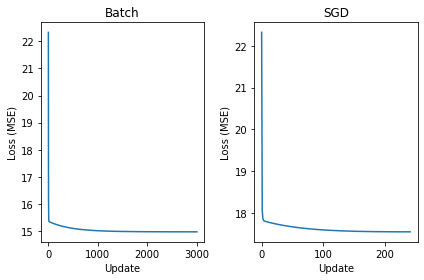

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(model_batch.loss)
ax[1].plot(model_sgd.loss)

for i, title in enumerate(['Batch', 'SGD']):
    ax[i].set_title(title)
    ax[i].set_xlabel('Update')
    ax[i].set_ylabel('Loss (MSE)')

fig.tight_layout()